# Model Training (Member 2)

This notebook trains a Logistic Regression model on the preprocessed data and evaluates its performance.

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## 1. Load Data & Reconstruct Feature Names

Since the data was scaled using `StandardScaler` in the preprocessing step, it gets converted to a numpy array. We need to reload the original CSV and apply the same subset of operations to extract the exact list of feature names so we can map them back properly.

In [2]:
print("Reconstructing feature names...")
df = pd.read_csv("../data/telco.csv")
df.drop("customerID", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, drop_first=True)
X = df.drop("Churn", axis=1)
feature_names = X.columns

print("Loading preprocessed data...")
with open("../models/processed_data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)


Reconstructing feature names...
Loading preprocessed data...


## 2. Train Logistic Regression Model

In [3]:
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


Training Logistic Regression model...


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

## 3. Evaluate the Model

In [4]:
y_pred = model.predict(X_test)
print("\n--- Model Evaluation (Logistic Regression) ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\n--- Business Insight on Model Performance ---")
print(f"The model's Recall is {recall_score(y_test, y_pred):.2f}. In churn prediction, Recall is very important")
print("because it measures the percentage of actual churners we successfully identified. Missing a churn customer is costly.")



--- Model Evaluation (Logistic Regression) ---
Accuracy:  0.8197
Precision: 0.6831
Recall:    0.5952
F1 Score:  0.6361

Confusion Matrix:
[[933 103]
 [151 222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409


--- Business Insight on Model Performance ---
The model's Recall is 0.60. In churn prediction, Recall is very important
because it measures the percentage of actual churners we successfully identified. Missing a churn customer is costly.


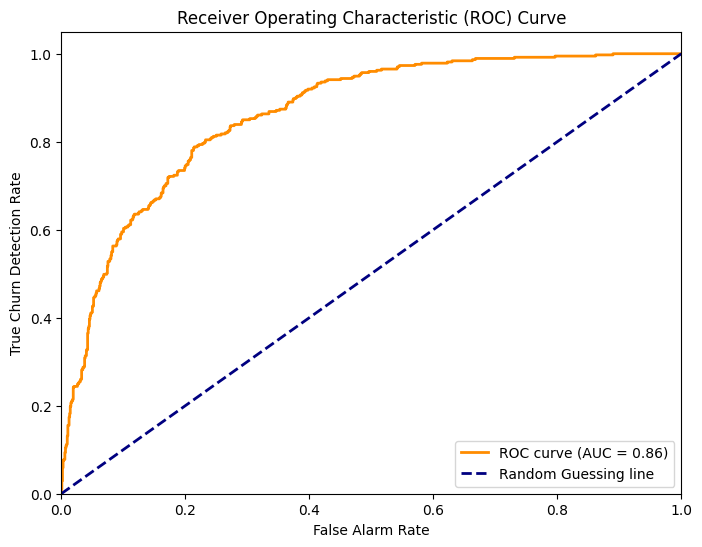

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the test set
# (Logistic Regression outputs probabilities between 0 and 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Alarm Rate')
plt.ylabel('True Churn Detection Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and download the image for your presentation
plt.savefig("../models/roc_curve.png")
plt.show()


## 4. Save Model Artifacts for Streamlit UI (Member 4)

In [5]:
with open("../models/model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("../models/feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)
print("\nModel and feature names saved respectively to '../models/model.pkl' and '../models/feature_names.pkl'")



Model and feature names saved respectively to '../models/model.pkl' and '../models/feature_names.pkl'
